In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical

In [2]:
from keras import models,layers

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [4]:
X_train=X_train.astype('float32')
X_test=X_test.astype("float32")

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

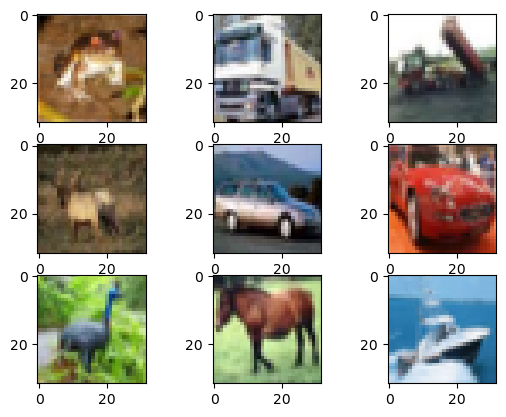

In [8]:
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(X_train[i],cmap='gray')
plt.show()


In [9]:
X_train.shape


(50000, 32, 32, 3)

In [10]:
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Dropout

In [11]:
#base
model_0=Sequential()
model_0.add(Flatten(input_shape=(32,32,3)))
model_0.add(Dense(100,activation='relu'))
model_0.add(Dense(50,activation='relu'))
model_0.add(Dropout(0.25))
model_0.add(Dense(10,activation='softmax'))

In [12]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 312860 (1.19 MB)
Trainable params: 312860 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history=model_0.fit(X_train,y_train,epochs=2,validation_split=0.2)

Epoch 1/2


1250/1250 [==============================] - 14s 10ms/step - loss: 1.9832 - accuracy: 0.2731 - val_loss: 1.8128 - val_accuracy: 0.3436
Epoch 2/2
1250/1250 [==============================] - 12s 10ms/step - loss: 1.8280 - accuracy: 0.3441 - val_loss: 1.7532 - val_accuracy: 0.3654


In [15]:
model_0.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.7294 - accuracy: 0.3714


[1.729361891746521, 0.37139999866485596]

In [16]:
model_0.predict(X_test)

313/313 [==============================] - 1s 4ms/step


array([[0.03375918, 0.09295794, 0.06402773, ..., 0.07151628, 0.07131371,
        0.02048299],
       [0.10737215, 0.16722496, 0.0072658 , ..., 0.00227737, 0.58239675,
        0.12530327],
       [0.16539253, 0.05705385, 0.01334374, ..., 0.0054681 , 0.692693  ,
        0.05377045],
       ...,
       [0.00981264, 0.00861739, 0.02898883, ..., 0.02964608, 0.04581654,
        0.00608585],
       [0.01221217, 0.01707164, 0.09942698, ..., 0.05251072, 0.006851  ,
        0.00672167],
       [0.06281675, 0.03073184, 0.17523107, ..., 0.28306982, 0.01636118,
        0.02976588]], dtype=float32)

In [17]:
#xavier
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(100,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(50,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='softmax',kernel_initializer='glorot_uniform'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               307300    
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 312860 (1.19 MB)
Trainable params: 312860 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history_1=model.fit(X_train,y_train,epochs=2,validation_split=0.2)

Epoch 1/2
1250/1250 [==============================] - 12s 9ms/step - loss: 1.9139 - accuracy: 0.3012 - val_loss: 1.8045 - val_accuracy: 0.3611
Epoch 2/2
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7437 - accuracy: 0.3731 - val_loss: 1.6934 - val_accuracy: 0.3995


In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6665 - accuracy: 0.4042


[1.6665253639221191, 0.4041999876499176]

In [22]:
model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


array([[0.05136434, 0.2727987 , 0.03658069, ..., 0.00674214, 0.2826103 ,
        0.00739096],
       [0.03720013, 0.17216162, 0.00074614, ..., 0.00100507, 0.51749706,
        0.26674086],
       [0.06309641, 0.11774044, 0.00170523, ..., 0.00128644, 0.6542706 ,
        0.14773385],
       ...,
       [0.0033926 , 0.00156477, 0.02770846, ..., 0.04335276, 0.00228772,
        0.00252602],
       [0.02094495, 0.01923611, 0.0773826 , ..., 0.07001505, 0.00190704,
        0.01322276],
       [0.075284  , 0.00768681, 0.16779934, ..., 0.26195747, 0.01466268,
        0.0151028 ]], dtype=float32)

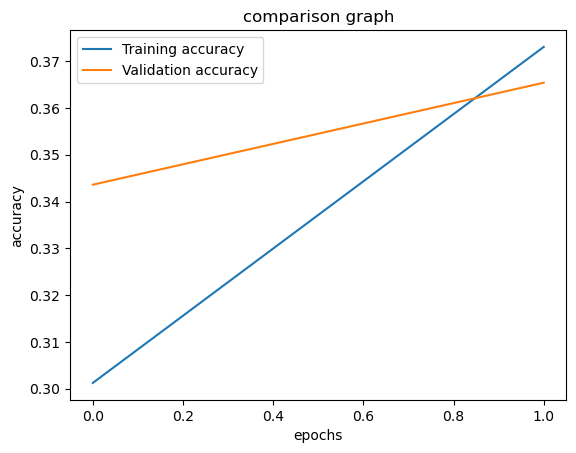

In [23]:
plt.title("comparison graph")
plt.plot(history_1.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()